SIMULATING AN ORBITAL SYSTEM


1.   Brute Force


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
import pandas as pd

Initialization of Simulation Parameters



In [ ]:
t0 = 0
dt = 10;
tf = dt* 365 * 10
G = 6.67e-11

t = np.arange(0,tf+dt, dt)
r = np.zeros((len(t),3,9))
v = np.zeros((len(t),3,9))
m = np.array([1.989*10**6,0.33011,4.867,5.97,0.64,1898,568.34,86.81,102.41])*10**24
r[0,0,:]=np.array([0,57.9,108.21,149.59,227.92,778.57,1453.53,2872.46,4495.06])*10**9
v[0,1,:]=np.array([0,47.36,35.02,29.78,24.07,13,9.68,6.8,5.43])*10**3


In [ ]:
r[0,1,0]

0.0

Propagation

In [ ]:
for i in range(len(t)-1):
  for j in range(0,9):# 9 = No. of Planets
    a = np.zeros(3) # acceleration vector
    #a[0] = ((v[i,0,j]**2 + v[i,1,j]**2)/((r[i,0,j]**2)+(r[i,1,j]**2)))*r[i,0,j]
    #a[1] = ((v[i,0,j]**2 + v[i,1,j]**2)/((r[i,0,j]**2)+(r[i,1,j]**2)))*r[i,1,j]
    for k in range(0,9):
      if k!= j:
          #R = np.zeros((len(t),3))
          Rmag = np.sqrt(np.sum((r[i,:,j]-r[i,:,k])**2))
          #Rmag = np.sqrt((r[i,0,j]-r[i,0,k])**2 + (r[i,1,j]-r[i,1,k])**2 + (r[i,2,j]-r[i,2,k])**2)
          a[:] += -((G*m[k])/(Rmag)**2)* (r[i,:,j]-r[i,:,k])/(Rmag)
          print((r[i,:,j]-r[i,:,k])/(Rmag))
    v[i+1,:,j] = v[i,:,j] + a[:]*dt
    r[i+1,:,j] = r[i,:,j] + v[i,:,j]*dt

      
      

Streaming output truncated to the last 5000 lines.
[9.99999821e-01 5.97762530e-04 0.00000000e+00]
[ 0.99999854 -0.00170646  0.        ]
[ 0.99999931 -0.0011759   0.        ]
[ 9.99999544e-01 -9.55056190e-04  0.00000000e+00]
[ 9.99999741e-01 -7.19699969e-04  0.00000000e+00]
[-9.99999984e-01  1.76093333e-04  0.00000000e+00]
[-9.99999994e-01  1.06003638e-04  0.00000000e+00]
[-9.99999997e-01  7.29198683e-05  0.00000000e+00]
[9.99999972e-01 2.38415441e-04 0.00000000e+00]
[ 9.99999533e-01 -9.66353258e-04  0.00000000e+00]
[ 9.99999773e-01 -6.74292298e-04  0.00000000e+00]
[ 9.99999848e-01 -5.51841958e-04  0.00000000e+00]
[ 9.99999912e-01 -4.20328837e-04  0.00000000e+00]
[ 9.99999984e-01 -1.76093333e-04  0.00000000e+00]
[-9.99999997e-01  7.26632002e-05  0.00000000e+00]
[-9.99999999e-01  5.00241638e-05  0.00000000e+00]
[9.99999996e-01 8.47496569e-05 0.00000000e+00]
[ 9.99999867e-01 -5.15813278e-04  0.00000000e+00]
[ 9.99999933e-01 -3.65468126e-04  0.00000000e+00]
[ 9.99999954e-01 -3.02134806e-04

Plotting

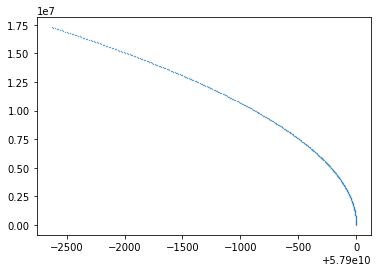

In [ ]:

plt.scatter(r[:,0,1],r[:,1,1],s=0.1)
plt.show()  


In [ ]:
a = np.zeros(3)
a

array([0., 0., 0.])

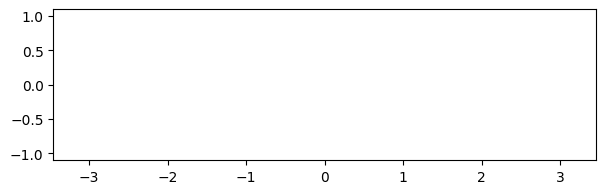

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
fig = plt.figure(figsize=(7,2), dpi=100)
ax = plt.subplot()
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)
line1, = ax.plot(X, C, marker="o", markevery=[-1],
markeredgecolor="white")
line2, = ax.plot(X, S, marker="o", markevery=[-1],
markeredgecolor="white")
def update(frame):
  line1.set_data(X[:frame], C[:frame])
  line2.set_data(X[:frame], S[:frame])
ani = animation.FuncAnimation(fig, update, interval=10)
writer = animation.FFMpegWriter(fps=30)
anim = animation.FuncAnimation(fig, update, interval=10, frames=
len(X))
anim.save("sine-cosine.mp4", writer=writer, dpi=100)

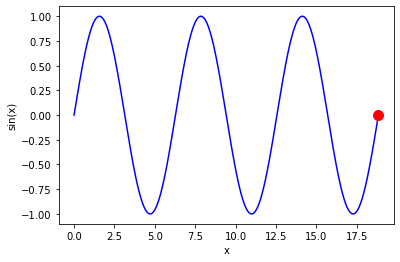

In [ ]:

n = 1000
x = np.linspace(0, 6*np.pi, n)
y = np.sin(x)

FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',comment='a red circle following a blue sine wave')
writer = FFMpegWriter(fps=15, metadata=metadata)

fig = plt.figure()

# plot the sine wave line
sine_line, = plt.plot(x, y, 'b')
red_circle, = plt.plot([], [], 'ro', markersize = 10)
plt.xlabel('x')
plt.ylabel('sin(x)')

with writer.saving(fig, "writer_test.mp4", 100):
    for i in range(n):
        x0 = x[i]
        y0 = y[i]
        red_circle.set_data(x0, y0)
        writer.grab_frame()
